In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
import pandas as pd
df=pd.read_csv('D:/Python file/Project Datasets/FinalEval/Skyserver.csv')  #Path location of the dataset
df.head()  #Checking out the top 5 rows of the dataset

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df.shape    #Checking the dimensions of the dataset

(10000, 18)

In [4]:
df.columns   #Checking out the columns of the dataset

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

# Dataset Description

Introduction:

     The Sloan Digital Sky Survey has created the most detailed three-dimensional maps of the Universe ever made, with deep multi-color images of one third of the sky, and spectra for more than three million astronomical objects. Learn and     explore all phases and surveys—past, present, and future—of the SDSS. In this notebook we will try to classify          observations of space to be either stars, galaxies or quasars. We will try to have a complete cycle of the data science workflow including querying the database to get the dataset, data analysis and building machine learning models on basis of class to predict for new data.
     
Feature Description:

     -> The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature   
     columns and 1 class column which identifies it to be either a star, galaxy or quasar.

     -> The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and  "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

-> View "PhotoObj"
   
    objid = Object Identifier
    
    ra = J2000 Right Ascension (r-band)
    
    dec = J2000 Declination (r-band)

    Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at  the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in  English the skies or the sky) in the equatorial coordinate system.
    
 Source: https://en.wikipedia.org/wiki/Right_ascension
 
    u = better of DeV/Exp magnitude fit

    g = better of DeV/Exp magnitude fit

    r = better of DeV/Exp magnitude fit
 
    i = better of DeV/Exp magnitude fit

    z = better of DeV/Exp magnitude fit 
    
-> The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

 Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html
 
    run = Run Number

    rereun = Rerun Number

    camcol = Camera column

    field = Field number 
    
-> Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

     - run number, which identifies the specific scan,

     - the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and

     - the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for  particularly long runs.

     - An additional number, rerun, specifies how the image was processed.
     
-> View "SpecObj"

     specobjid = Object Identifier

     class = object class (galaxy, star or quasar object)
     
-> The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be        trying to predict.     

    redshift = Final Redshift

    plate = plate number

    mjd = MJD of observation

    fiberid = fiber ID
    
-> In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or        shifted to the red end of the spectrum.

-> Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at      the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a        unique serial number, which is called plate in views such as SpecObj in the CAS.

-> Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

-> The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead.        Each object is assigned a corresponding fiberID.   


# Our agenda in this project

-> Totally there are 10000 observations and 18 columns in the dataset.

-> We need to predict if the 10000 observations of space taken by the SDSS is either a star, galaxy or quasar and we are going      to approach by using classification analysis.

In [5]:
df.info()    #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Except class, which is of object, all other columns are either float or int datatype

In [6]:
df.isnull().sum()   #Checking for null values in the dataset

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

As we can see, there are no missing data in this dataset

# Exploratory Data Analysis 

In [7]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


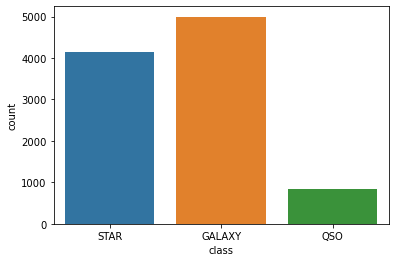

In [8]:
#Plotting countplot for checking the number of class data present
print(df['class'].value_counts())
sns.countplot(x='class',data=df)
plt.show()

GALAXY has been recorded as the most observations in the dataset with 4998 records, STAR has 4152 records and QSO has 850 recorded observations

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


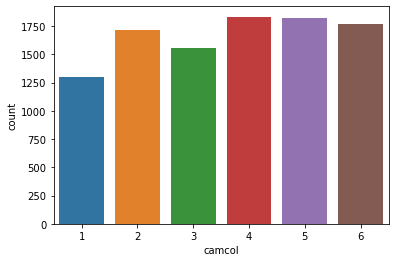

In [9]:
#Counting the camera column using countplot
print(df['camcol'].value_counts())
sns.countplot(x='camcol',data=df)
plt.show()

The 4th type of camcol has the highest value with 1834 whereas the 1st type of camcol has the least value with 1298 recordings

Text(0.5, 1.0, 'QSO')

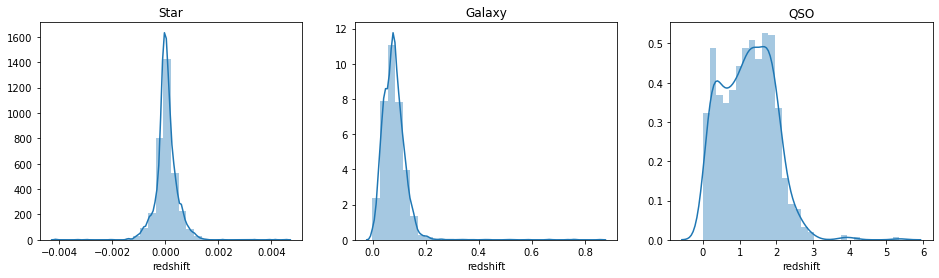

In [10]:
#Plotting distplot for redshift feature column of each class
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16, 4))
ax = sns.distplot(df[df['class']=='STAR'].redshift, bins = 30, ax = axes[0],kde=True)
ax.set_title('Star')
ax = sns.distplot(df[df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1],kde=True)
ax.set_title('Galaxy')
ax = sns.distplot(df[df['class']=='QSO'].redshift, bins = 30, ax = axes[2],kde=True)
ax.set_title('QSO')

Observation:

-> The Star class data distribution looks like zero-centered normal distribution

-> The Galaxy class data distribution looks like it is rightly skewed and falls in range 0.0-0.2.

-> The QSO class data distribution looks like they are nearly normal distributed from 0 to 3 but after that there is no normal      distribution and it is due to the presence of outliers.

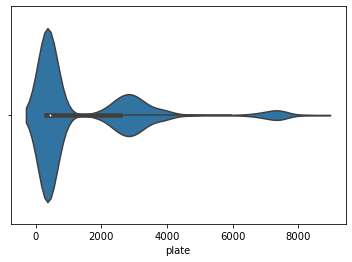

In [11]:
#Checking the distribution of plate count using violin plot
sns.violinplot(df['plate'])
plt.show()

The values of plate number are falling in the ranges 0-500, 2000-4000 and also in 7000 range too

# Bivariate Analysis

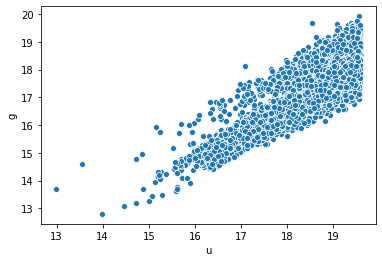

In [12]:
#Plotting scatterplot between 2 features
sns.scatterplot(x='u',y='g',data=df)

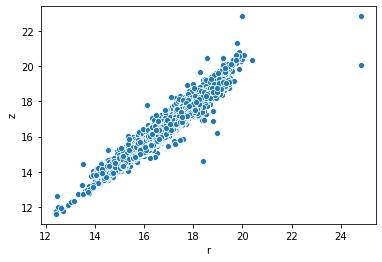

In [13]:
sns.scatterplot(x='r',y='z',data=df)

Text(0.5, 1.0, 'Direction of a point on the celestial sphere vs class')

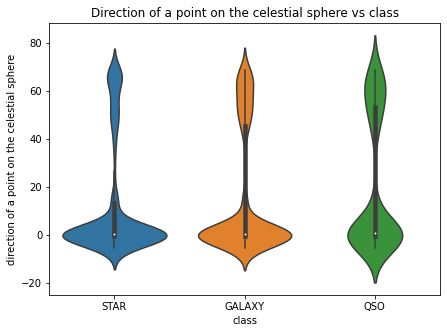

In [14]:
#Checking relationship between dec and class using violinplot
plt.figure(figsize=(7,5))
sns.violinplot(x='class',y='dec',data=df)
plt.xlabel('class')
plt.ylabel('direction of a point on the celestial sphere')
plt.title('Direction of a point on the celestial sphere vs class')

# Multivariate Analysis

In [15]:
df.describe()    #Statistical summary of the dataset

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Observations:

1.The difference between the mean and median of dec is high and it is due to outliers and other columns have minimal difference

2.For some columns, the difference between 75th percentile and max value is high due to outliers and we should handle them in     further analysis.

In [16]:
#Dropping objid and rerun as they are the same values for all the records and also specobjid as it is not important
df.drop(columns=['objid','rerun','specobjid'],axis=1,inplace=True)

In [17]:
#Checking the dataset after dropping
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922,512


In [18]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,0.015414,-0.093723,-0.086558,-0.040493


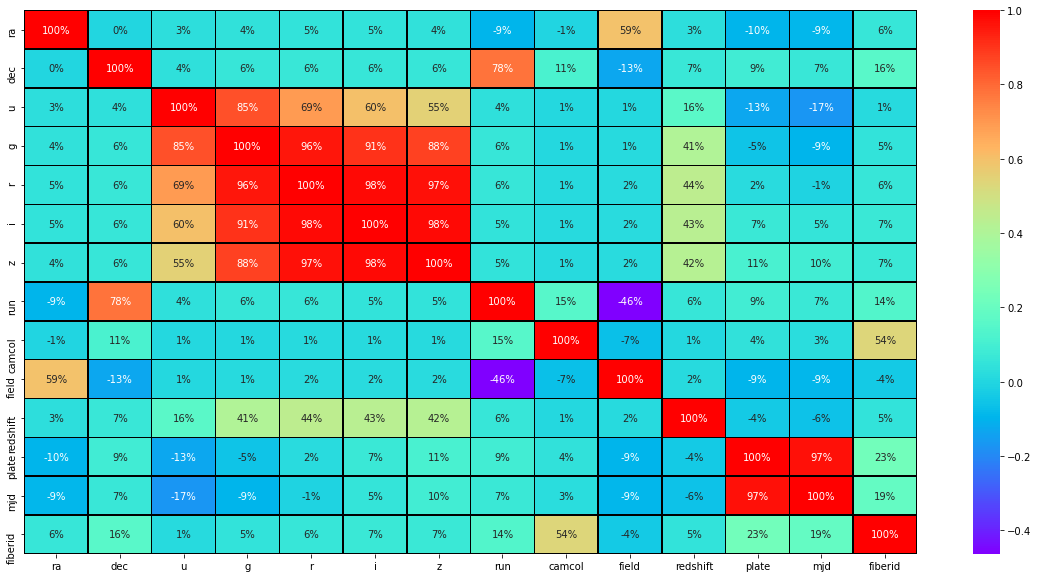

In [19]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(20,10))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Observations:

1.There are more number of positively correlated features in this dataset.

2.Highest postive correlated value is 98% and it is with columns like i along z and r along i.

3.Most negatively correlated value is -46% and it is field column along with run.

4.Positively correlated columns have high impact with the target variable and negatively correlated columns have less or zero     impact with the target variable.

# Converting categorical data into numeric

As class column has categorical data, we need to convert into numerical for proceeding further analysis and it can be done by using LabelEncoder

In [20]:
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'].astype(str))   #Converting class column

In [21]:
#Checking class column after conversion
df['class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

The categorical column class has been converted into numerical type and now we can proceed further

# Checking skewness

In [22]:
df.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

There are both positive and negative skewness in this dataset and now we will check the distribution of data

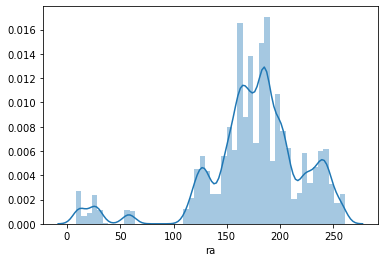

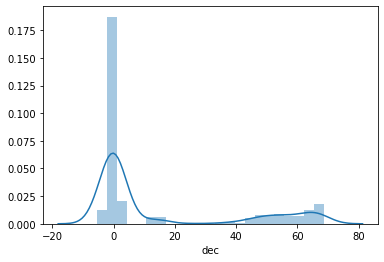

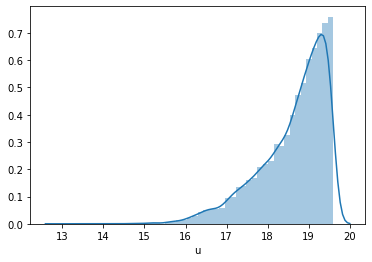

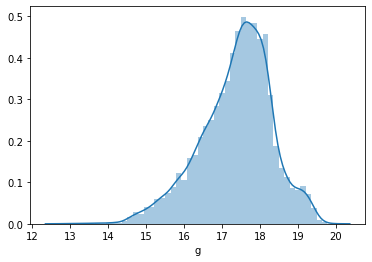

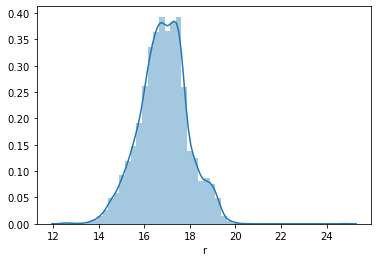

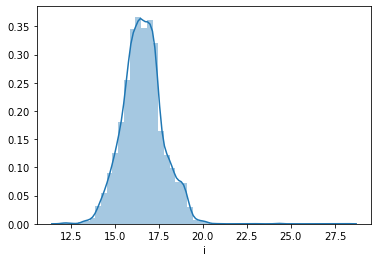

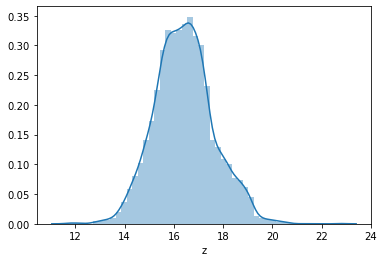

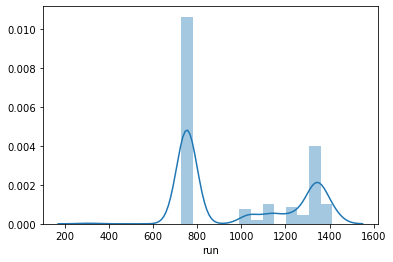

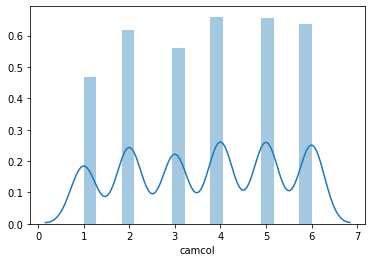

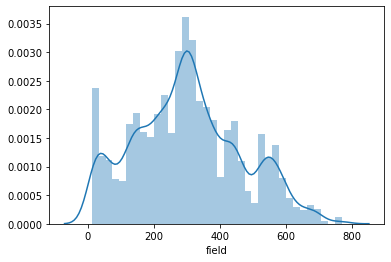

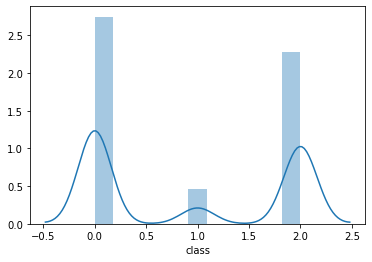

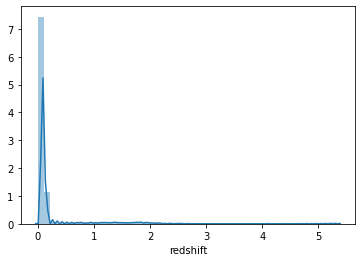

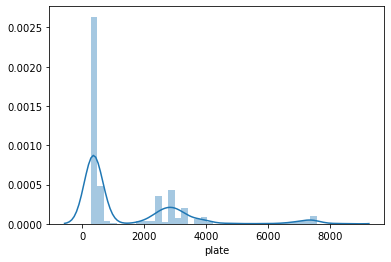

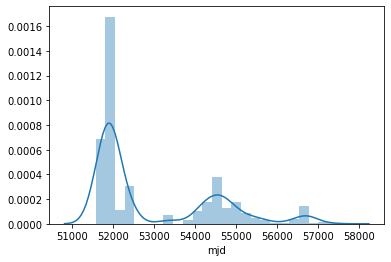

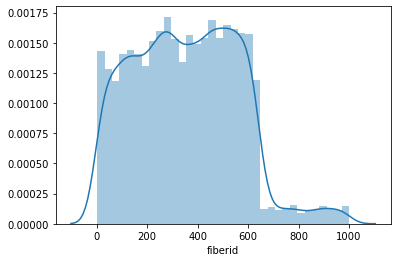

In [23]:
#Plotting distplot for checking the distribution of skewness
for col in df.describe().columns:
    sns.distplot(df[col])
    plt.show()

Most of the features are not normally distributed and it is due to the presence of outliers.

# Checking outliers

We can check outliers by plotting boxplot

In [24]:
collist=df.columns.values 
ncol=15
nrows=15

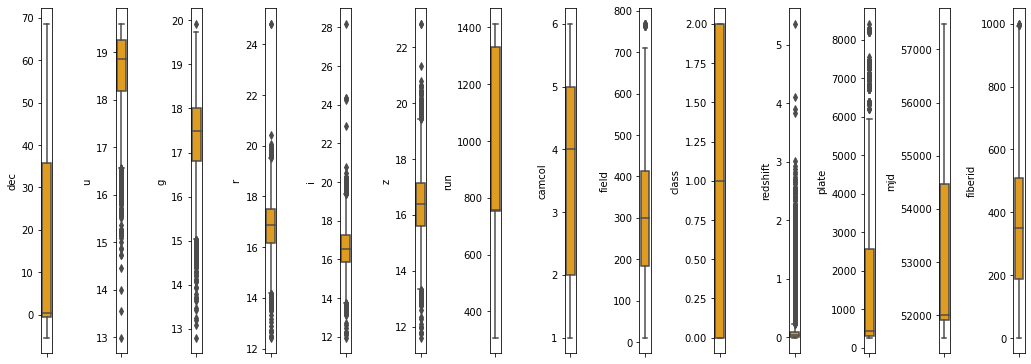

In [25]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient='v')
    plt.tight_layout()

Most of the columns are having outliers and they can be handled by using z-score 

# Handling outliers by using z-score method

In [26]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64),
 array([11, 11, 11, ..., 12, 12, 12], dtype=int64))

In [27]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,0,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,0,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,0,0.014019,447,51877,229


In [28]:
df.shape   #Original dataset dimensions

(10000, 15)

In [29]:
df_new.shape    #New dataset dimensions

(8698, 15)

Nearly 1000+ rows had outliers data and they had been handled by using z-score method

# Preparing dataset for model training

We need to split independent and dependent variables from the dataset in order to perform further analysis

In [30]:
df_x=df_new.drop('class',axis=1)   #Independent variables
y=df_new['class']    #Dependent or Target Variable

In [31]:
#Checking x data
df_x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0.000590,3306,54922,512


In [32]:
#Checking y data after splitting
y

0       2
1       2
2       0
3       2
4       2
       ..
9993    0
9995    0
9996    0
9998    0
9999    0
Name: class, Length: 8698, dtype: int32

# Treating skewness

In [33]:
#We are treating skewness by using cube root transform and square root transform
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.cbrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col]=np.sqrt(df_x[col])

In [34]:
df_x.skew()    #Checking skewness after treating it

ra         -0.130951
dec         0.598346
u          -1.023622
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
run         0.518602
camcol     -0.141193
field       0.220032
redshift    0.383962
plate       0.877994
mjd         0.954315
fiberid     0.065374
dtype: float64

We can see that the skewness has been treated and now we can proceed for model building

# Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [35]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,0.022563,-0.233531,1.063403,-0.332856,-0.855097,-0.969819,-1.007660,-0.790307,0.197332,-0.304679,-1.178877,1.615890,1.665903,0.754994
1,0.024421,-0.198898,0.049930,-0.134171,-0.098144,-0.009474,0.055512,-0.790307,0.197332,-0.304679,-1.247953,-0.713942,-0.888875,1.016814
2,0.026689,-0.205105,0.950686,0.994046,0.729930,0.573183,0.429065,-0.790307,0.197332,-0.298398,0.898012,-0.790776,-0.567886,0.870195
3,0.031964,-0.275395,-1.097219,-0.840484,-0.632831,-0.503275,-0.388577,-0.790307,0.197332,-0.292117,-1.288017,1.615890,1.665903,0.854486
4,0.032318,-0.222754,-1.376460,-1.232219,-0.344809,0.054530,0.257682,-0.790307,0.197332,-0.292117,-0.759446,1.615890,1.665903,0.864958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,-1.422261,1.491533,-1.057414,-1.506087,-1.672305,-1.737999,-1.816223,1.360326,-0.394324,-0.970460,0.433171,-0.486401,-0.682556,-0.512213
8694,-1.424548,1.491607,0.245204,0.161438,0.149590,0.179351,0.159624,1.360326,-0.394324,-0.970460,0.115229,-0.486401,-0.682556,-0.527922
8695,-1.424834,1.493278,-0.445438,0.124446,0.317548,0.212045,0.335821,1.360326,-0.394324,-0.964179,0.868765,-0.486401,-0.682556,-0.622177
8696,-1.420093,1.494312,0.326996,0.669608,0.789334,0.841588,0.737782,1.360326,-0.394324,-0.957898,-0.129317,-0.486401,-0.682556,-0.616941


# Building the model

In [36]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
from sklearn.metrics import accuracy_score

In [37]:
#Finding the best random state and accuracy
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training accuracy_score is: ',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy_score is: ',accuracy_score(y_test,pred_test)*100)

At random state 20 ,the model performs well
Training accuracy_score is:  99.08019545846508
Testing accuracy_score is:  99.08045977011494
At random state 66 ,the model performs well
Training accuracy_score is:  99.08019545846508
Testing accuracy_score is:  99.08045977011494
At random state 78 ,the model performs well
Training accuracy_score is:  99.08019545846508
Testing accuracy_score is:  99.08045977011494
At random state 185 ,the model performs well
Training accuracy_score is:  99.08019545846508
Testing accuracy_score is:  99.08045977011494
At random state 263 ,the model performs well
Training accuracy_score is:  99.08019545846508
Testing accuracy_score is:  99.08045977011494
At random state 320 ,the model performs well
Training accuracy_score is:  99.08019545846508
Testing accuracy_score is:  99.08045977011494
At random state 325 ,the model performs well
Training accuracy_score is:  99.08019545846508
Testing accuracy_score is:  99.08045977011494
At random state 337 ,the model perfor

We can see that at random_state=20, the best scores are obtained so that we can use in our train_test_split

In [38]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=.20,stratify=y)

# Finding out the best model

We are going to use LogisticRegression, SVC, GaussianNB, DecisionTreeClassifier and KNeighborsClassifier algorithms for finding out the best model among those

In [39]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
#Initializing the instance of the model
LR=LogisticRegression()
svc=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

In [41]:
models= []
models.append(('Logistic Regression',LR))
models.append(('SupportVectorClassifier',svc))
models.append(('GaussianNB',gnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [42]:
#Importing required modules and metrices
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [43]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)    
    print('\n\n\n')

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9942528735632183


cross_val_score:  0.9908019538246979


Classification report:
 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       955
           1       0.94      0.96      0.95        82
           2       1.00      1.00      1.00       703

    accuracy                           0.99      1740
   macro avg       0.98      0.99      0.98      1740
weighted avg       0.99      0.99      0.99      1740



Confusion matrix: 

[[948   5   2]
 [  3  79   0]
 [  0   0 703]]




****************************** SupportVectorClassifier ***************************


SVC()


accuracy_score:  0.993103448275862


cross_val_score:  0.9873531491873384


Classification report:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.95      0.93     

In [44]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,Logistic Regression,99.425287,99.080195
1,SupportVectorClassifier,99.310345,98.735315
2,GaussianNB,96.666667,97.102642
3,DecisionTreeClassifier,99.195402,98.263865
4,KNeighborsClassifier,98.160920,97.137230


From the above algorithms, Logistic Regression, SVC and DecisionTreeClassifier algorithms are working well as they are giving good accuracy score and cross validation score. Now we will try to find out the best parameters and improve our scores by using Hyperparameter Tuning technique.

# Hyperparameter Tuning

Logistic Regression

In [45]:
#Creating parameter list to pass in GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[10, 1, 0.1, 0.01,0.001,0.001],'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [46]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
LR=LogisticRegression()
grid=GridSearchCV(LR,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9905138327672972


In [47]:
#Using the best parameters
LR=LogisticRegression(C=10,penalty='l2',solver='newton-cg')
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('Final Accuracy after tuning is: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Final Accuracy after tuning is:  99.36781609195403
Cross validation score:  99.11469797016386
Classification report: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       955
           1       0.93      0.98      0.95        82
           2       1.00      1.00      1.00       703

    accuracy                           0.99      1740
   macro avg       0.97      0.99      0.98      1740
weighted avg       0.99      0.99      0.99      1740

Confusion matrix: 

[[948   5   2]
 [  2  80   0]
 [  1   1 701]]


SVC

In [48]:
#Creating parameter list to pass in GridSearchCV
parameters={'C':[10, 1, 0.1, 0.01,0.001],'kernel':['poly','rbf','linear'],'gamma':['scale','auto']}

In [49]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
svc=SVC()
grid=GridSearchCV(svc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.9906575109282167


In [50]:
#Using the best parameters obtained 
svc=SVC(C=10,gamma='scale',kernel='linear',random_state=20)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Final Accuracy after tuning is: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Final Accuracy after tuning is:  99.48275862068967
Cross validation score:  99.19517756935218
Classification report: 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       955
           1       0.94      0.98      0.96        82
           2       1.00      1.00      1.00       703

    accuracy                           0.99      1740
   macro avg       0.98      0.99      0.98      1740
weighted avg       0.99      0.99      0.99      1740

Confusion matrix: 

[[949   5   1]
 [  2  80   0]
 [  1   0 702]]


Decision Tree Classifier

In [51]:
#Creating parameters list to pass in GridSearchCV
parameters={'criterion':['gini','entropy'],'random_state':range(0,10),'splitter':['best','random']}

In [52]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid=GridSearchCV(dtc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'entropy', 'random_state': 5, 'splitter': 'best'}
0.9876396498012676


In [53]:
#Using the best parameters obtained 
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=5)
dtc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Final Accuracy after tuning is: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(dtc,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Final Accuracy after tuning is:  99.48275862068967
Cross validation score:  98.48244135551546
Classification report: 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       955
           1       0.94      0.98      0.96        82
           2       1.00      1.00      1.00       703

    accuracy                           0.99      1740
   macro avg       0.98      0.99      0.98      1740
weighted avg       0.99      0.99      0.99      1740

Confusion matrix: 

[[949   5   1]
 [  2  80   0]
 [  1   0 702]]


After using Hyperparameter Tuning on the best 3 algorithms we found, we can see that SVC algorithm is the best working algorithm as the scores have been increased, i.e, accuracy score has been increased from 99.31 to 99.48 and cross_val_score has been increased from 98.73 to 99.19 and also the metrics values have been improved. We will also try Ensemble Techniques to boost up our scores.

# Ensemble Techniques for boosting our scores

In [54]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=20)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000,1200],'criterion' :['gini', 'entropy']}
grid=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'gini', 'n_estimators': 50}
0.987783224670914


In [55]:
#Using the best parameters obtained
RF=RandomForestClassifier(random_state=20,criterion='gini',n_estimators=50)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  99.3103448275862
Cross validation score:  98.82728877079575
Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.94      0.94        82
           2       1.00      1.00      1.00       703

    accuracy                           0.99      1740
   macro avg       0.98      0.98      0.98      1740
weighted avg       0.99      0.99      0.99      1740

Confusion matrix: 

[[949   5   1]
 [  5  77   0]
 [  1   0 702]]


In [56]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(random_state=20)   #Using the best random state we obtained
parameters={'n_estimators':[50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1]}
grid=GridSearchCV(adc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 1, 'n_estimators': 50}
0.9517125693084443


In [57]:
#Using the best parameters obtained
adc=AdaBoostClassifier(random_state=20,n_estimators=50,learning_rate=1)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adc,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  94.6551724137931
Cross validation score:  76.1136866874211
Classification report: 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       955
           1       0.27      0.05      0.08        82
           2       1.00      1.00      1.00       703

    accuracy                           0.95      1740
   macro avg       0.73      0.68      0.68      1740
weighted avg       0.92      0.95      0.93      1740

Confusion matrix: 

[[943  11   1]
 [ 78   4   0]
 [  3   0 700]]


In [58]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=20)   #Using the best random state we obtained
parameters={'n_estimators':[50,100,500,1000],'learning_rate':[0.0001,0.001,0.01,0.1]}
gbc=GridSearchCV(gbc,parameters,cv=5,scoring='accuracy')
gbc.fit(x_train,y_train)
print(gbc.best_params_)     #Printing the best parameters obtained
print(gbc.best_score_)      #Mean cross-validated score of best_estimator

{'learning_rate': 0.01, 'n_estimators': 1000}
0.9903702578976507


In [59]:
#Using the best parameters obtained
gbc=GradientBoostingClassifier(random_state=20,n_estimators=1000,learning_rate=0.01)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbc,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  99.3103448275862
Cross validation score:  99.06870773928735
Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.93      0.95      0.94        82
           2       1.00      1.00      1.00       703

    accuracy                           0.99      1740
   macro avg       0.97      0.98      0.98      1740
weighted avg       0.99      0.99      0.99      1740

Confusion matrix: 

[[949   6   0]
 [  4  78   0]
 [  2   0 701]]


After applying the Tuning and Ensemble Techniques, we can say that SVC is the best algorithm we got as the accuracy score is 99.48 and cross validation score is 99.19. We will now finalize the model.

# Finalizing the model

In [60]:
svc_prediction=svc.predict(x)
print('Predictions of SVC: ',svc_prediction)

Predictions of SVC:  [2 2 0 ... 0 0 0]


In [61]:
#Saving the model
import joblib
joblib.dump(svc,'SDSS_Project_Classification.obj')

['SDSS_Project_Classification.obj']

# Saving the predicted values

In [62]:
pred_results=pd.DataFrame(svc_prediction)
pred_results.to_csv('SDSS_Project_Classification_Results.csv')

# Conclusion

-> After exploring the SDSS data, we came to know that how SDSS image is working and how to navigate and plot the sky image        using camera data.

-> First we loaded the dataset and did the EDA process and other pre-processing techniques like skewness check and removal,        handling the outliers present, filling the missing data, visualizing the distribution of data,etc.

-> Then we did the model training, building the model and finding out the best model on the basis of different metrices scores      we got like Classification Report, Confusion matrix, cross validation score, etc.

-> We got SupportVectorClassifier Algorithm, Logistic Regression and Decision Tree Classifier as the best algorithms among all      as the accuracy score was 99% and cross validation score was between 98-99%. Then for finding out the best parameter and        improving the scores, we performed Hyperparameter Tuning in all these 3 algorithms.

-> After Tuning, we got that SVC algorithm is the best working algorithm as the scores have been increased, i.e, accuracy score    has been increased from 99.31 to 99.48 and cross_val_score has been increased from 98.73 to 99.19 and also the metrics values    have been improved.

-> We also tried Ensemble Techniques to boost up the scores and we used algorithms like Random Forest Classifier, AdaBoost          Classifier and Gradient Boosting Classifier.

-> Finally we concluded that SVC was the best algorithm among all other algorithms as its scores were good and we finalized the    model. We saved the predicted values in a new dataframe and also we saved the model too.

-> Overall, we can say that this dataset is an excellent dataset for predicting the category in the space as the average            accuracy of the dataset was nearly 97% and the error rate was minimal too, which is very good and also the best model can be    used again and again during further deployment process.